# Explore here

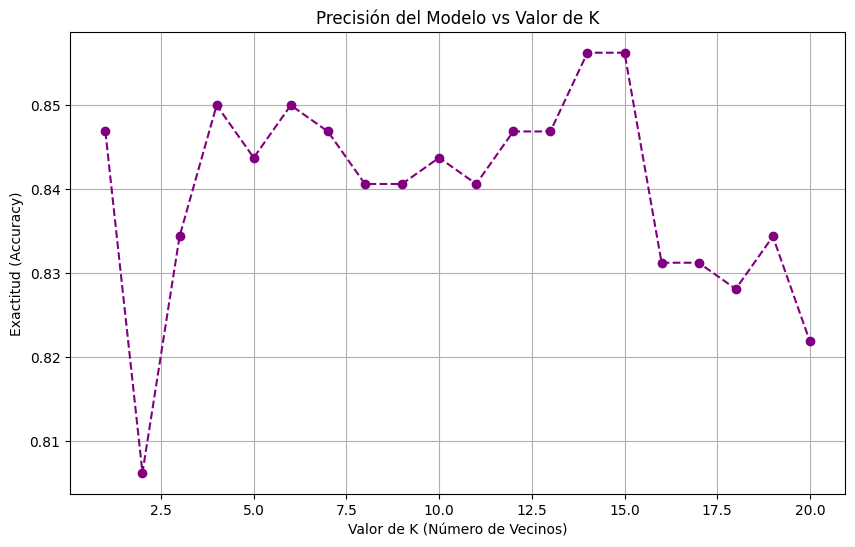

✅ El mejor valor de K encontrado es: 14

--- Reporte de Clasificación Final ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.98      0.92       262
           2       0.75      0.38      0.51        47

    accuracy                           0.86       320
   macro avg       0.54      0.45      0.47       320
weighted avg       0.82      0.86      0.83       320



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


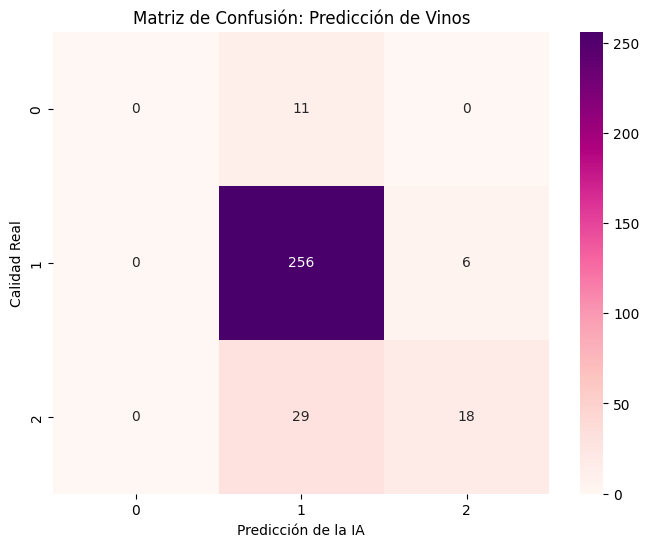


Prueba de predicción con un vino nuevo:
Resultado: Calidad media (Aceptable para cena) 🍷


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. CARGA Y PREPARACIÓN DE DATOS

enlace_datos = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
# El dataset original usa punto y coma (;) como separador
df_vinos = pd.read_csv(enlace_datos, sep=";")

# Definimos la lógica para categorizar la calidad del vino según las instrucciones
def categorizar_vino(puntaje):
    if puntaje <= 4:
        return 0  # Baja calidad
    elif puntaje <= 6:
        return 1  # Calidad media
    else:
        return 2  # Alta calidad

# Creamos la etiqueta objetivo 'calidad_label'
df_vinos['calidad_label'] = df_vinos['quality'].apply(categorizar_vino)


# 2. PROCESAMIENTO Y ESCALADO

# Separamos las variables químicas (X) de las etiquetas (y)
X_quimicos = df_vinos.drop(["quality", "calidad_label"], axis=1)
y_etiquetas = df_vinos["calidad_label"]

# Dividimos el dataset (80% entrenamiento, 20% prueba)
X_entreno_raw, X_prueba_raw, y_entreno, y_prueba = train_test_split(
    X_quimicos, y_etiquetas, test_size=0.2, random_state=42
)

# IMPORTANTE: KNN se basa en distancias, por lo que escalar los datos es obligatorio
normalizador = StandardScaler()
X_entreno_escalado = normalizador.fit_transform(X_entreno_raw)
X_prueba_escalado = normalizador.transform(X_prueba_raw)


# 3. ENTRENAMIENTO Y OPTIMIZACIÓN DE K

# Buscamos el valor de K que ofrezca mejor precisión (1 al 20)
rango_k = range(1, 21)
lista_precisiones = []

for k in rango_k:
    modelo_knn_temp = KNeighborsClassifier(n_neighbors=k)
    modelo_knn_temp.fit(X_entreno_escalado, y_entreno)
    pred_temp = modelo_knn_temp.predict(X_prueba_escalado)
    lista_precisiones.append(accuracy_score(y_prueba, pred_temp))

# Graficamos los resultados para análisis visual

plt.figure(figsize=(10, 6))
plt.plot(rango_k, lista_precisiones, marker='o', linestyle='--', color='purple')
plt.title("Precisión del Modelo vs Valor de K")
plt.xlabel("Valor de K (Número de Vecinos)")
plt.ylabel("Exactitud (Accuracy)")
plt.grid(True)
plt.show()

# Seleccionamos automáticamente el mejor K
mejor_k = rango_k[lista_precisiones.index(max(lista_precisiones))]
print(f"✅ El mejor valor de K encontrado es: {mejor_k}")


# 4. MODELO FINAL Y EVALUACIÓN

modelo_sommelier_ia = KNeighborsClassifier(n_neighbors=mejor_k)
modelo_sommelier_ia.fit(X_entreno_escalado, y_entreno)

# Evaluación detallada
predicciones_finales = modelo_sommelier_ia.predict(X_prueba_escalado)
print("\n--- Reporte de Clasificación Final ---")
print(classification_report(y_prueba, predicciones_finales))

# Matriz de Confusión para ver dónde se equivoca la IA
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_prueba, predicciones_finales), annot=True, fmt='g', cmap='RdPu')
plt.title("Matriz de Confusión: Predicción de Vinos")
plt.xlabel("Predicción de la IA")
plt.ylabel("Calidad Real")
plt.show()


# 5. FUNCIÓN DE PREDICCIÓN (SOMMELIER IA)

def predecir_calidad_vino(medidas_quimicas):
    # El modelo espera datos escalados
    datos_nuevos = normalizador.transform([medidas_quimicas])
    resultado = modelo_sommelier_ia.predict(datos_nuevos)[0]
    
    categorias = {
        0: "Baja calidad (Poco recomendable) ❌",
        1: "Calidad media (Aceptable para cena) 🍷",
        2: "Alta calidad (¡Digno de un sommelier!) 🌟"
    }
    return f"Resultado: {categorias[resultado]}"

# Prueba de ejemplo
ejemplo_vino = [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]
print("\nPrueba de predicción con un vino nuevo:")
print(predecir_calidad_vino(ejemplo_vino))